# First task: Data understanding

We have two datasets to analyze:
- **cyclists.csv**: contains the information about all the cyclists;
- **races.csv**: contains the information about all the cyclism races.



## Import of all the libraries and the dataset

In the following, we import all the main libraries needed to this project and we read the .cvs files that contin the data. The data are assigned to Pandas dataframe with the name of cyclists and races.

In [1]:
import warnings
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

import os

cyclists = pd.read_csv('./dataset/cyclists.csv')
races = pd.read_csv('./dataset/races.csv')

## Cyclists dataset

We begin the understanding of our data showing the first five rows of the cyclists dataset. It is composed by 6 attributes:
- **_url**: identifier of the cyclist;
- **name**: full name of the cyclist;
- **birth_year**: year of birth of the cyclist;
- **weight**: weigth of the cyclist;
- **height**: height of the cyclist;
- **nationality**: nationality of the cyclist.

Then we show general information about the values of the dataset.

In [2]:
cyclists.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [3]:
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


Before analyzing the values we show that there aren't duplicated rows in the dataset that could influence further studies.

In [4]:
print(f"Number of duplicated rows in cyclists dataset: {cyclists.duplicated().sum()}")

Number of duplicated rows in cyclists dataset: 0


We can see that _url and name entry have no null value, birth_year and nationality have few null entry while weight and height have half of value null. More precisely:

In [5]:
cyclists_null = cyclists.isnull().sum()
print("Number of null values in each column:\n")
print(cyclists_null)

Number of null values in each column:

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64


We use the *.describe()* method to get some hight level statistics of the numerical entries.

In [6]:
cyclists.describe()

,birth_year,weight,height
count,6121.000000,3078.000000,3143.000000
mean,1974.071884,68.658739,179.815145
std,15.535834,6.348183,6.443447
min,1933.000000,48.000000,154.000000
25%,1962.000000,64.000000,175.000000
50%,1974.000000,69.000000,180.000000
75%,1987.000000,73.000000,184.000000
max,2004.000000,94.000000,204.000000


To conclude a general view about the cyclist dataset values we check if we have values that are not plausible.

In [7]:
invalid_birth_year = cyclists[cyclists['birth_year'] < 1900 | (cyclists['birth_year'] > 2010)]
print(f"Number of invalid birth_year: {len(invalid_birth_year)}")

invalid_height = cyclists[((cyclists['height'] < 100) | (cyclists['height'] > 220)) & (cyclists['height'] != -1)]
print(f"Number of invalid height: {len(invalid_height)}")

invalid_weight = cyclists[((cyclists['weight'] < 30) | (cyclists['weight'] > 150)) & (cyclists['weight'] != -1)]
print(f"Number of invalid weight: {len(invalid_weight)}")


Number of invalid birth_year: 0
Number of invalid height: 0
Number of invalid weight: 0


## Races dataset

The races dataset is composed by the following attributes:
- **_url**: identifier for the race, typically includes the race name, year, and stage.
- **name**: the official name of the race (e.g., "Tour de France").
- **points**: points assigned to the race, indicating its prestige or importance.
- **uci_points**: alternative points assigned based on UCI rankings.
- **length**: the total distance of the race, usually in meters.
- **climb_total**: the total meters climbed during the race, indicating elevation difficulty.
- **profile**: the race's terrain profile, such as flat, hilly, mountainous, or mixed.
- **startlist_quality**: the quality or strength of the participants in the race.
- **average_temperature**: the average temperature during the race, typically in degrees Celsius.
- **date**: the date on which the race took place.
- **position**: the final position or ranking of a specific cyclist in the race.
- **cyclist**: the unique identifier for the cyclist (_url attribute in the cyclists table).
- **cyclist_age**: the age of the cyclist during the race.
- **is_tarmac**: indicates if the race was held on tarmac surfaces.
- **is_cobbled**: indicates if the race featured cobbled sections.
- **is_gravel**: indicates if the race included gravel sections.
- **cyclist_team**: the team the cyclist was part of during the race.
- **delta**: the time difference in seconds between the cyclist and the race winner.

In [8]:
races.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


The general information about the values in the database are:

In [9]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

We can see that more than half of uci_points and average_temperature values are null, also climb_total, profile and cyclist_team have concerning number of null values. All the other entry have almost all non-null values. More precisely: 

In [10]:
races_null = races.isnull().sum()
print("Number of null values in each column:\n")
print(races_null)

Number of null values in each column:

_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64


Also in this dataset we show that there aren't duplicated rows.

In [11]:
print(f"Number of duplicated rows in races dataset: {races.duplicated().sum()}")

Number of duplicated rows in races dataset: 0


We use the *.describe()* method to get some hight level statistics of the numerical entries of the races dataset.

In [12]:
races.describe()

,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta
count,589388.000000,251086.000000,589865.000000,442820.000000,441671.000000,589865.000000,29933.000000,589865.000000,589752.000000,589865.000000
mean,89.221635,74.601547,166776.180584,2330.469215,2.611611,1101.161178,21.731768,74.219491,28.486208,418.292794
std,54.435330,100.947962,64545.605664,1375.710722,1.491741,380.586928,5.884761,48.404023,3.855631,842.961596
min,18.000000,6.000000,1000.000000,2.000000,1.000000,115.000000,10.000000,0.000000,13.000000,-6906.000000
25%,50.000000,16.000000,152500.000000,1309.000000,1.000000,844.000000,17.000000,32.000000,26.000000,10.000000
50%,80.000000,60.000000,178200.000000,2255.000000,2.000000,988.000000,22.000000,70.000000,28.000000,156.000000
75%,100.000000,100.000000,203500.000000,3273.000000,4.000000,1309.000000,26.000000,112.000000,31.000000,624.000000
max,350.000000,800.000000,338000.000000,6974.000000,5.000000,2047.000000,36.000000,209.000000,56.000000,61547.000000


To end this preliminary analysis we check if the values are plausible.

In [13]:
invalid_points = races[races['points'] < 0]
print(f"Number of invalid points: {len(invalid_points)}")

invalid_uci_points = races[races['uci_points'] < 0]
print(f"Number of invalid uci_points: {len(invalid_uci_points)}")

invalid_length = races[(races['length'] < 0) | (races['length'] > 400000)]
print(f"Number of invalid length: {len(invalid_length)}")

invalid_climb_total = races[(races['climb_total'] < 0) | (races['climb_total'] > 10000)]
print(f"Number of invalid climb_total: {len(invalid_climb_total)}")

invalid_ages = races[((races['cyclist_age'] < 17) | (races['cyclist_age'] > 45))]
print(f"Number of invalid cyclist_age: {len(invalid_ages)}")

Number of invalid points: 0
Number of invalid uci_points: 0
Number of invalid length: 0
Number of invalid climb_total: 0
Number of invalid cyclist_age: 2


The age of two cyclist is outside of our levels but for now we decide to take that.

In [14]:
races[((races['cyclist_age'] < 17) | (races['cyclist_age'] > 45))].head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
114525,vuelta-a-espana/1996/stage-1,Vuelta a España,80.0,NaN,162000.0,862.0,NaN,988,NaN,1996-09-07 03:52:27,129,jose-azevedo-goncalves,56.0,True,False,False,NaN,0.0
294489,san-sebastian/2001/result,Clasica Ciclista San Sebastian,225.0,NaN,227000.0,NaN,2.0,1048,NaN,2001-08-11 05:28:57,91,plamen-stanev,13.0,False,False,False,NaN,663.0


## Analysis of the data distribution

In the following we analyse the distribution of the numerical variable in the cyclists dataset.

The distribution of birth years follows our expectations, with most cyclists born between 1960 and 1990.

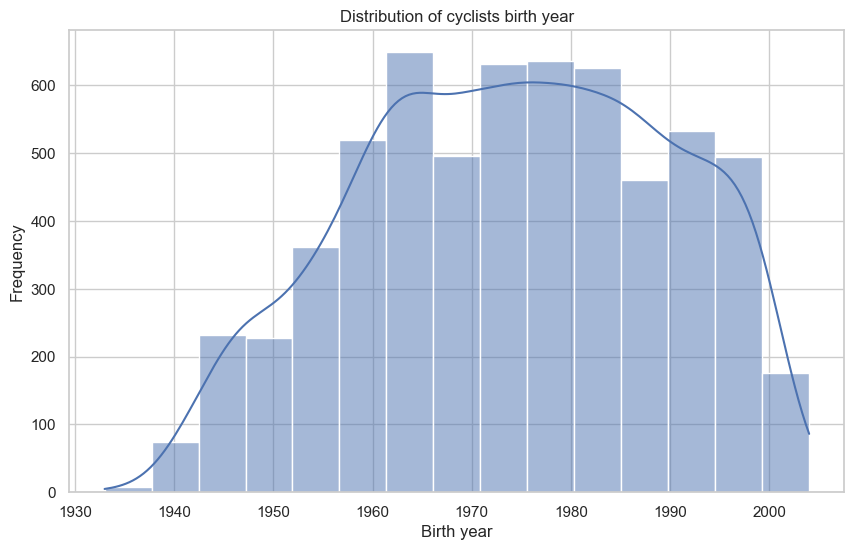

In [15]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(cyclists['birth_year'],bins=15, kde=True)
plt.title('Distribution of cyclists birth year')
plt.xlabel('Birth year')
plt.ylabel('Frequency')
plt.show()

Both height and weight show peaks, indicating that most cyclists are around 1.80 meters tall and weigh 70 kg.

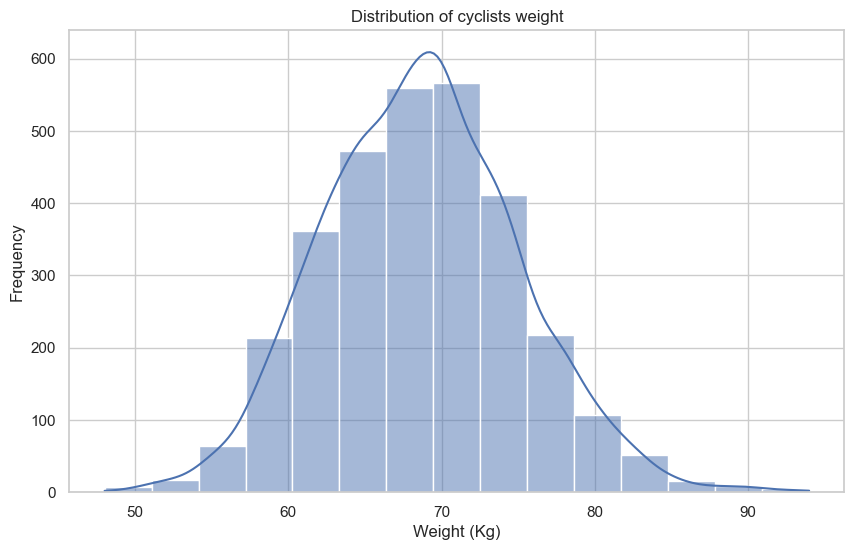

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(cyclists['weight'],bins=15, kde=True)
plt.title('Distribution of cyclists weight')
plt.xlabel('Weight (Kg)')
plt.ylabel('Frequency')
plt.show()

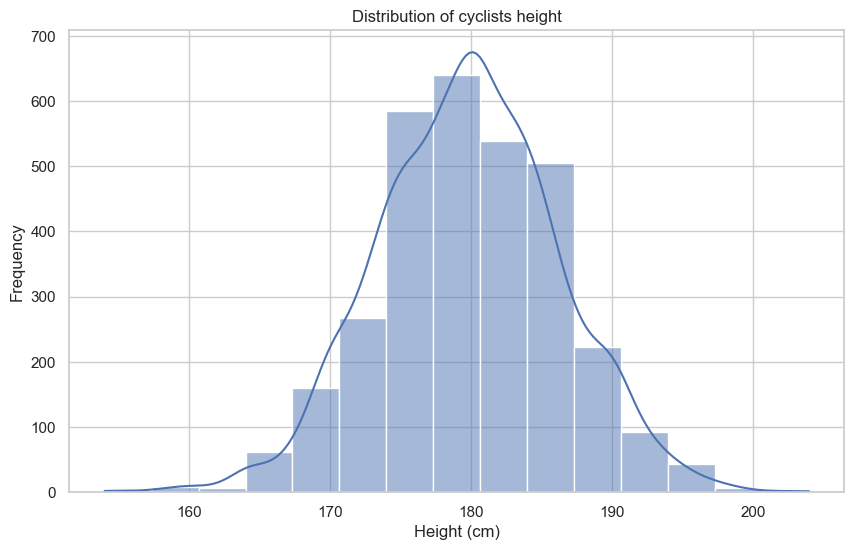

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(cyclists['height'],bins=15, kde=True)
plt.title('Distribution of cyclists height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

Now we show the distribution of categorical variable *nationality*.

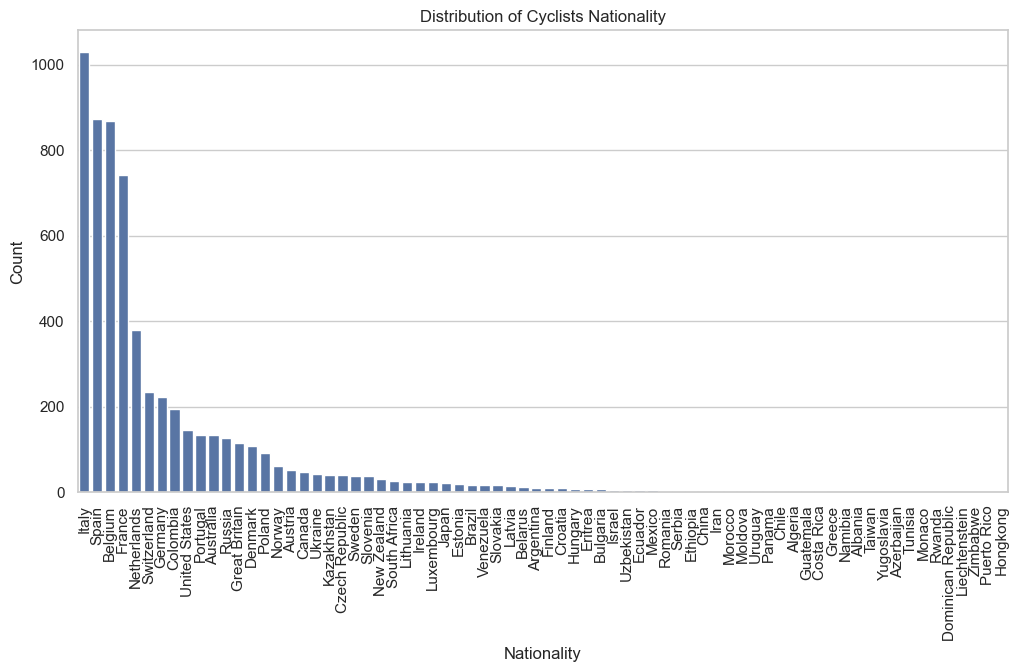

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=cyclists, x='nationality', order=cyclists['nationality'].value_counts().index)
plt.title('Distribution of Cyclists Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

We focus on the top 20 nationalities, which account for 91.995% of the total values.
It's also possible to notice that the italian cyclists are the majority with 16.78%:


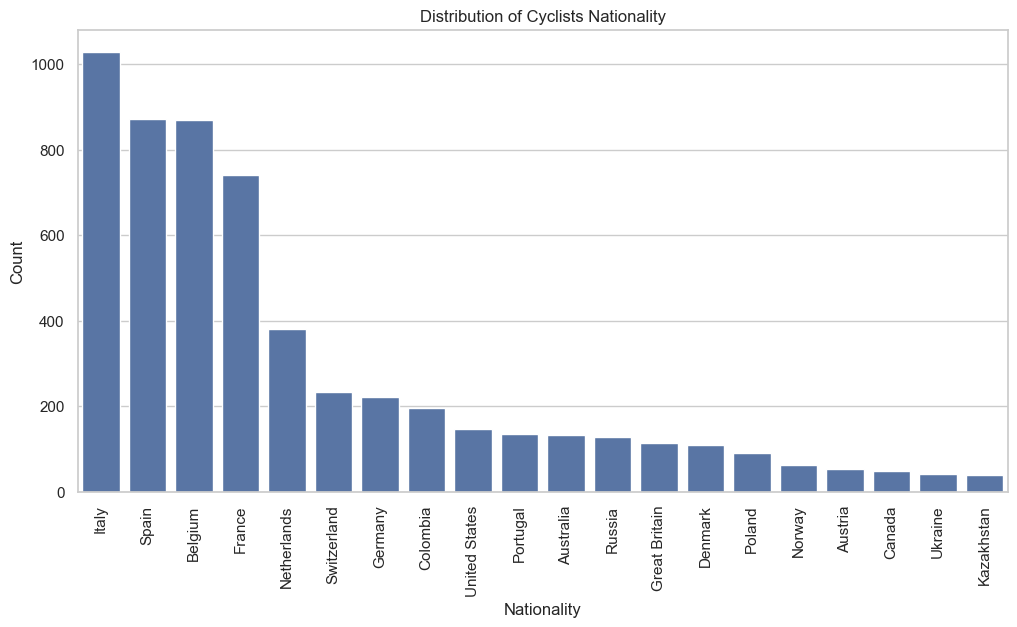

In [19]:
nationality_percentual = cyclists['nationality'].value_counts().head(20).sum() / len(cyclists) * 100
print(f"We focus on the top 20 nationalities, which account for {round(nationality_percentual,3)}% of the total values.")

italian_percentual = cyclists[cyclists['nationality'] == 'Italy'].shape[0] / len(cyclists) * 100
print(f"It's also possible to notice that the italian cyclists are the majority with {round(italian_percentual,2)}%:")

plt.figure(figsize=(12, 6))
sns.countplot(data=cyclists, x='nationality', order=cyclists['nationality'].value_counts().head(20).index)
plt.title('Distribution of Cyclists Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Then we analyse the distribution in the numerical variables of the races dataset.

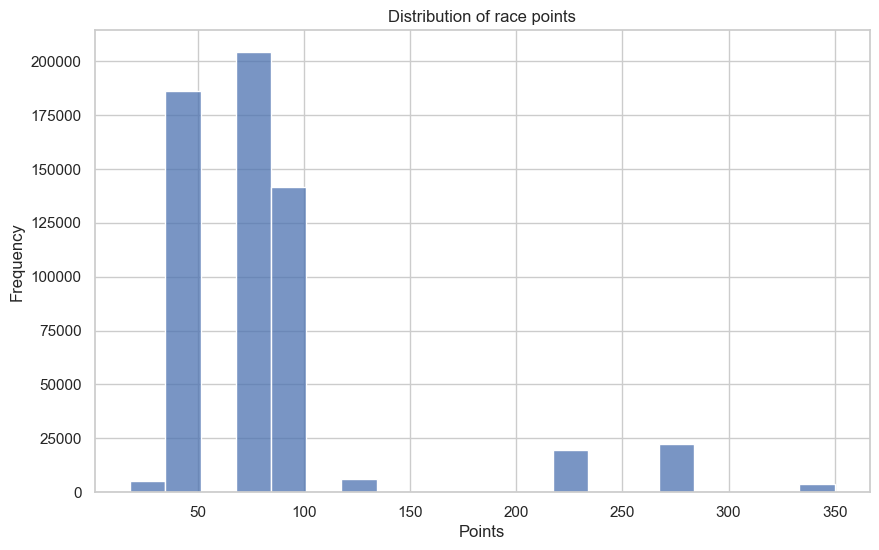

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(races['points'], bins=20)
plt.title('Distribution of race points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

It can be observed that since the uci points are much fewer (mostly being null) they have much lower values ​​than the points. Furthermore, it can be seen how the uci points in general reach higher values.

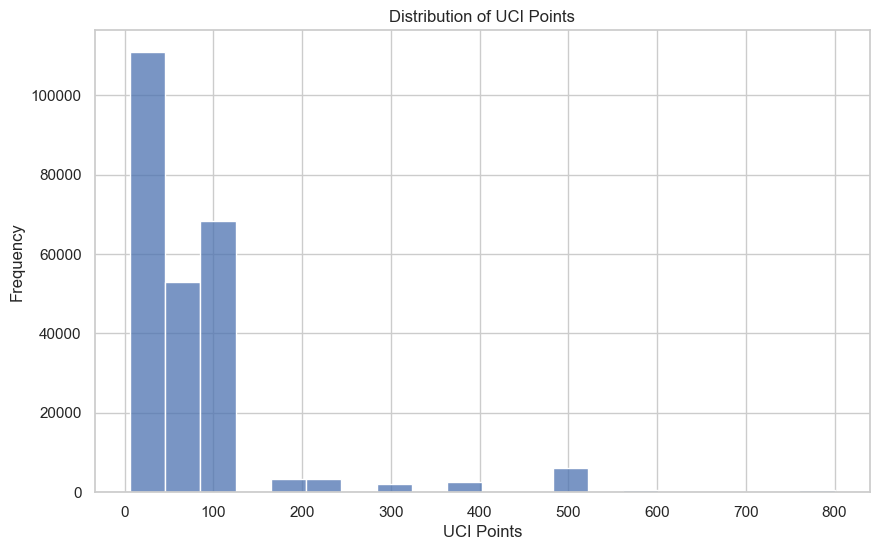

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(races['uci_points'], bins=20)
plt.title('Distribution of UCI Points')
plt.xlabel('UCI Points')
plt.ylabel('Frequency')
plt.show()

As for the length of the races, there is a majority of races between 150 km and 200 km.

NameError: name 'merged_data1' is not defined

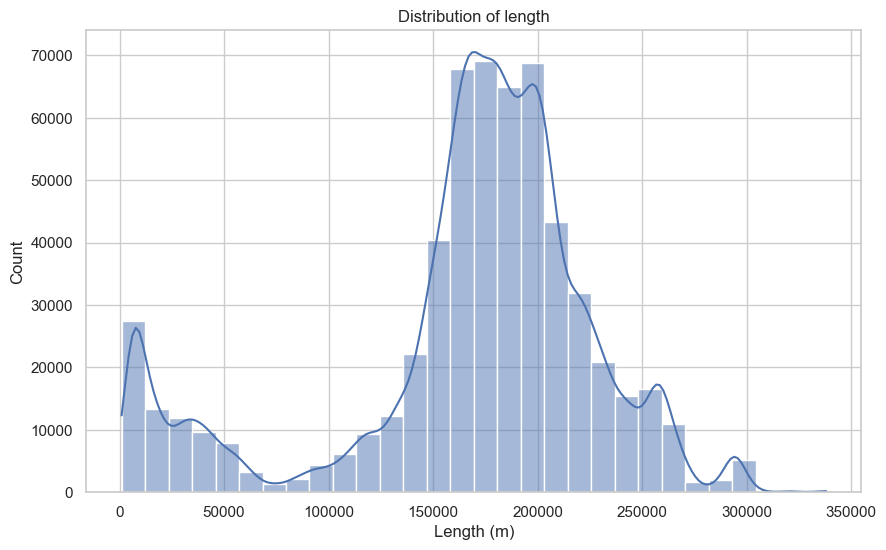

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(races['length'], bins=30, kde=True)
plt.title('Distribution of length')
plt.xlabel('Length (m)')# Create bins for weight and height
merged_data1['weight_bins'] = pd.cut(merged_data1['weight'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
merged_data1['height_bins'] = pd.cut(merged_data1['height'], bins=5, labels=['Short', 'Medium-Short', 'Medium', 'Medium-Tall', 'Tall'])

# Create a variable for combinations of weight and height categories
merged_data1['weight_height_comb'] = merged_data1['weight_bins'].astype(str) + " & " + merged_data1['height_bins'].astype(str)

# Configure the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=merged_data1,
    x='weight_height_comb',
    y='position',
    hue='nationality',
    palette='tab20',
    s=100,
    alpha=0.7
)

# Set axis labels and title
plt.title('Position in Race vs. Weight-Height Categories (Colored by Nationality)')
plt.xlabel('Weight & Height Categories')
plt.ylabel('Race Position')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Nationality', bbox_to_anchor=(1.02, 1), loc='upper left')

# Add grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
plt.ylabel('Frequency')
plt.xlim(left=1000)
plt.xticks(ticks=[1000] + list(range(50000, int(races['length'].max()) + 10000, 50000)))
plt.xticks(rotation=45)
plt.show()

Below is the distribution of the difference in altitude and the average temperature.

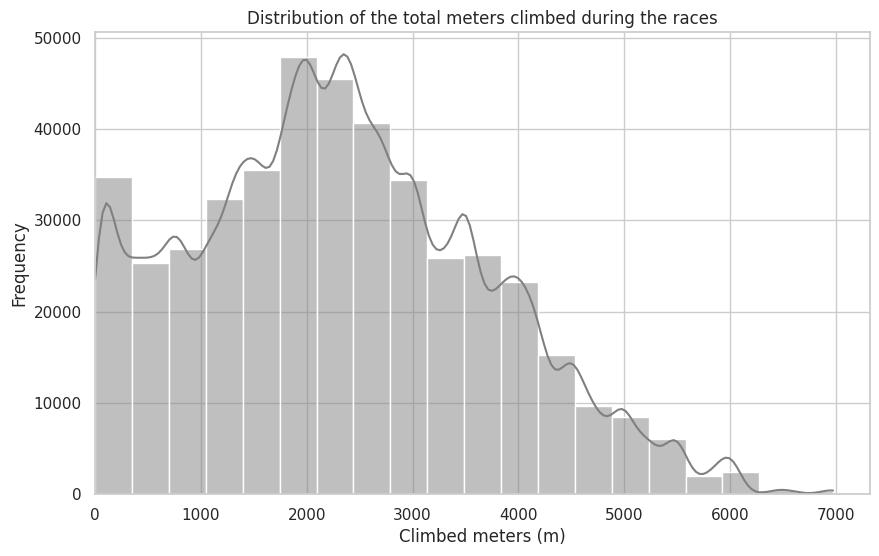

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(races['climb_total'], bins=20, kde=True, color='grey')
plt.title('Distribution of the total meters climbed during the races')
plt.xlabel('Climbed meters (m)')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.show()

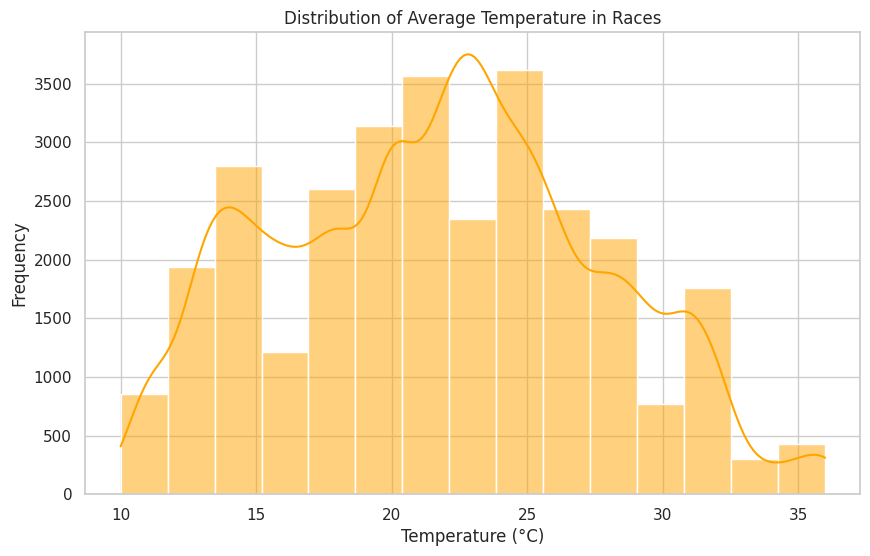

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(races['average_temperature'], bins=15, kde=True, color='orange')
plt.title('Distribution of Average Temperature in Races')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

The age of the cyclists, as mentioned, presents two anomalous values (13 and 56) ​​that are negligible and therefore are not highlighted by the distribution.

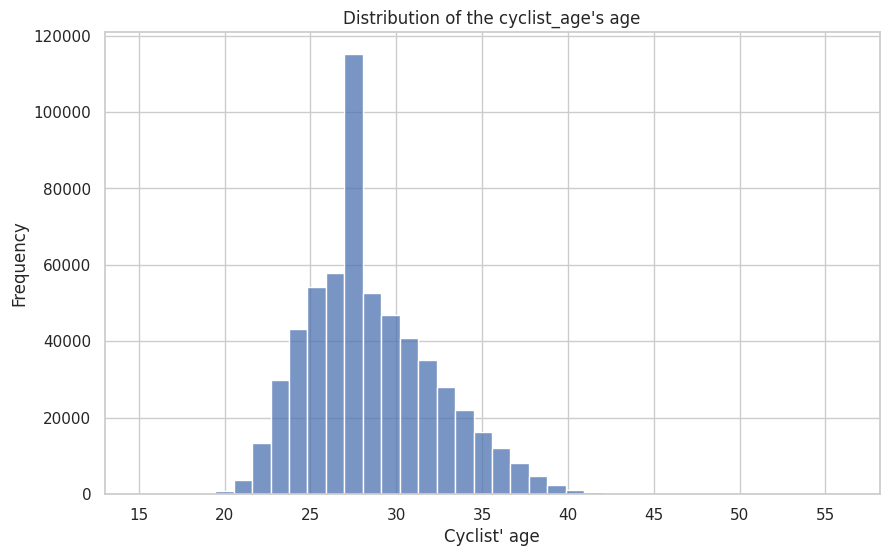

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(races['cyclist_age'], bins=40)
plt.title('Distribution of the cyclist_age\'s age')
plt.xlabel('Cyclist\' age')
plt.ylabel('Frequency')
plt.xlim(left=13)
plt.xticks(range(15, int(races['cyclist_age'].max()), 5))
plt.show()

As the final numerical value to analyze, we focus on delta. Being an increasing value as the position grows, the distribution shows a peak at zero, further accentuated by the multiple entries with a delta of 0 throughout the race. Additionally, we present the growth of delta relative to position, highlighting how cyclists tend to accumulate more delay as their position moves further from first place. We can also see that there are negative values that we can handle in outlier detection part.

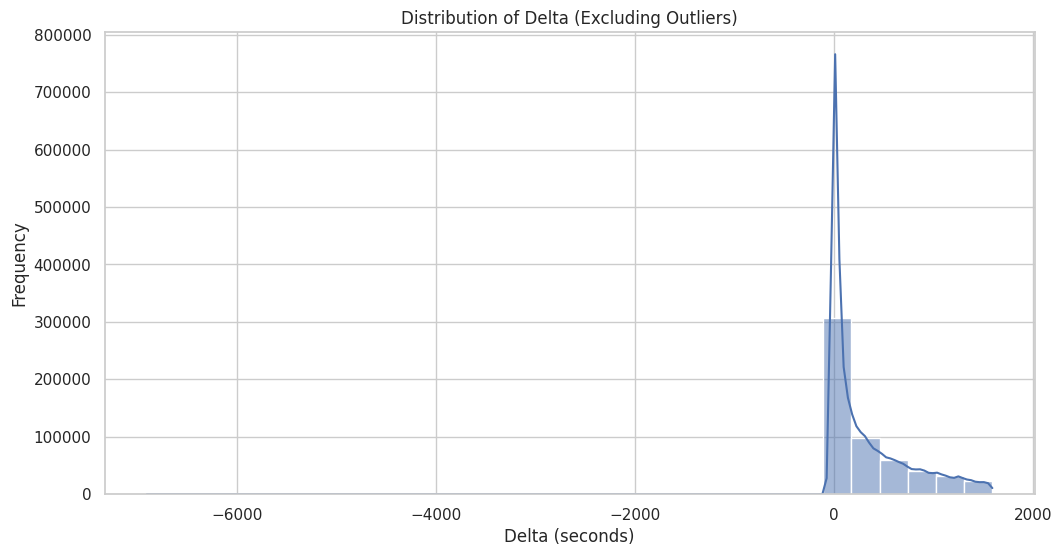

In [ ]:
upper_limit = races['delta'].quantile(0.95)  # Top 5% excluded
filtered_delta = races[races['delta'] <= upper_limit]['delta']

plt.figure(figsize=(12, 6))
sns.histplot(filtered_delta, bins=30, kde=True)
plt.title('Distribution of Delta (Excluding Outliers)')
plt.xlabel('Delta (seconds)')
plt.ylabel('Frequency')

plt.show()


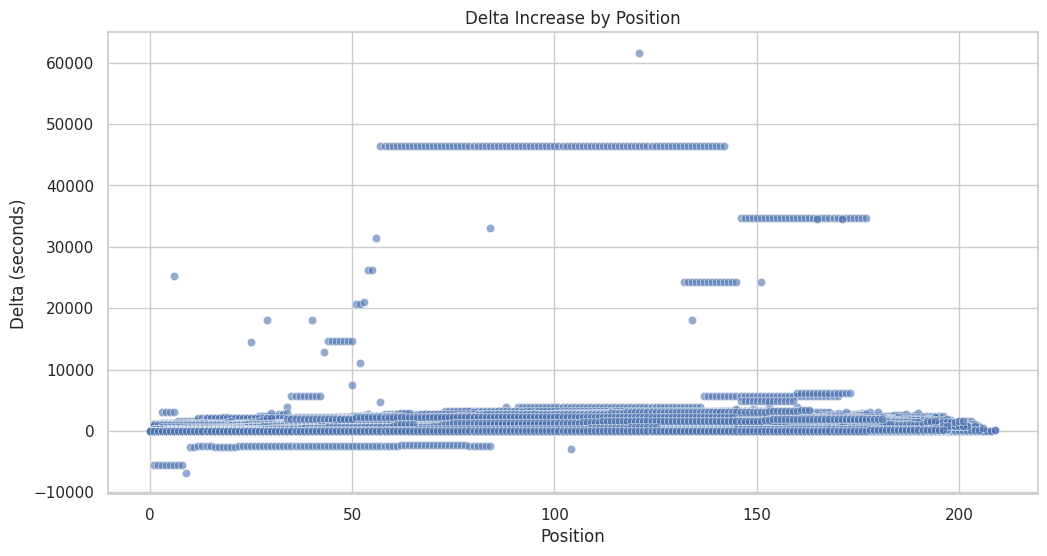

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=races, x='position', y='delta', alpha=0.6)
plt.title('Delta Increase by Position')
plt.xlabel('Position')
plt.ylabel('Delta (seconds)')

plt.show()

In the following we have the distribution of the categorical valuse including 'races' name, profiles, years and surfaces.

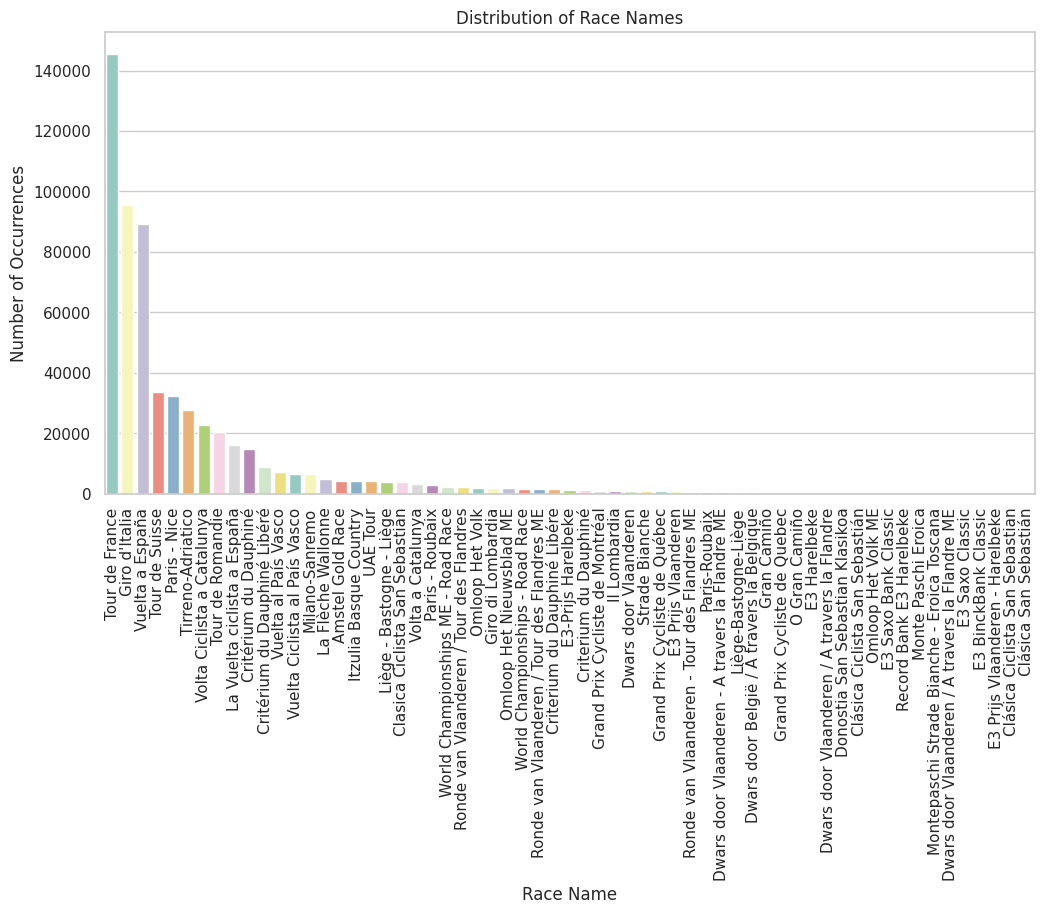

In [ ]:
races_name_distribution = races['name'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=races_name_distribution.index, y=races_name_distribution.values, hue=races_name_distribution.index, legend=False, palette='Set3')
plt.title('Distribution of Race Names')
plt.xlabel('Race Name')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()

We focus on the top 10 races in the dataset that represent the 93.728% of the total values:


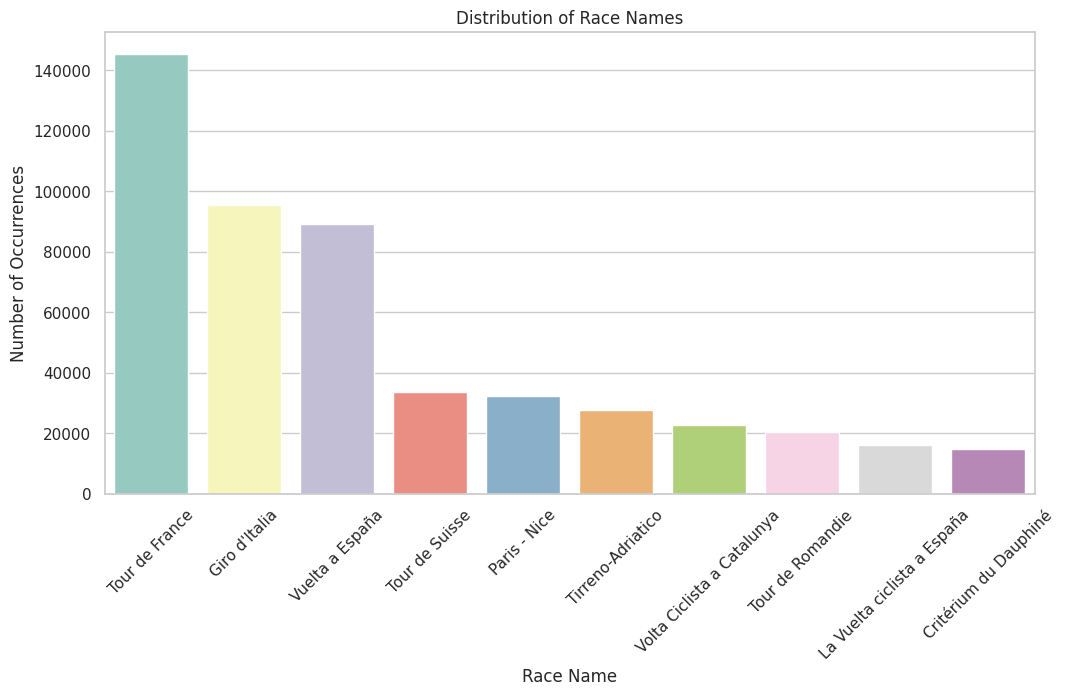

In [ ]:
races_percentual = races['name'].value_counts().head(20).sum() / len(races) * 100
print(f"We focus on the top 10 races in the dataset that represent the {round(races_percentual,3)}% of the total values:")

plt.figure(figsize=(12, 6))
sns.barplot(x=races_name_distribution.head(10).index, y=races_name_distribution.head(10).values, hue=races_name_distribution.head(10).index, legend=False, palette='Set3')
plt.title('Distribution of Race Names')
plt.xlabel('Race Name')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

The following distribution consider the profiles of the races, from flat with value 1 to high mountain with value of 5. 

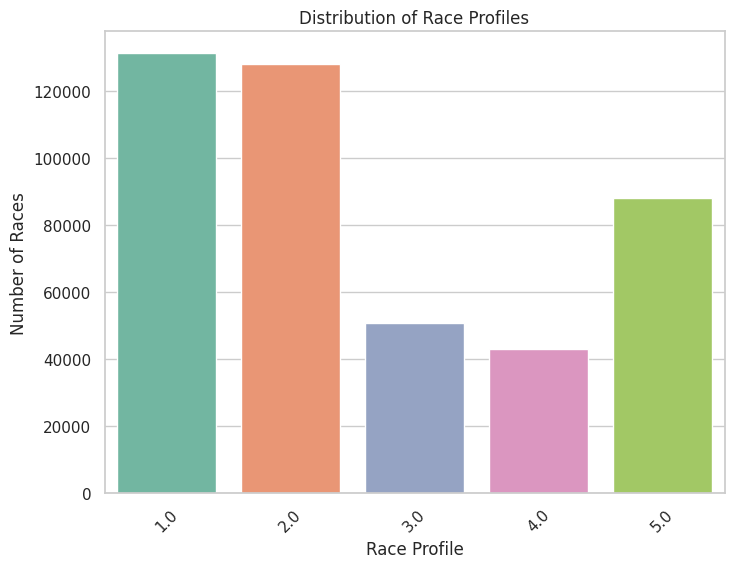

In [ ]:
profile_distribution = races['profile'].value_counts().reset_index()
profile_distribution.columns = ['Profile', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(data=profile_distribution, x='Profile', y='Count',hue='Profile', legend=False, palette='Set2')
plt.title('Distribution of Race Profiles')
plt.xlabel('Race Profile')
plt.ylabel('Number of Races')
plt.xticks(rotation=45)
plt.show()

All the races are between 1970 and 2023, in the dataset the majority of the races were raced after 1999. There is a lower value in 2020 probably due to the closure for the covid pandemic.

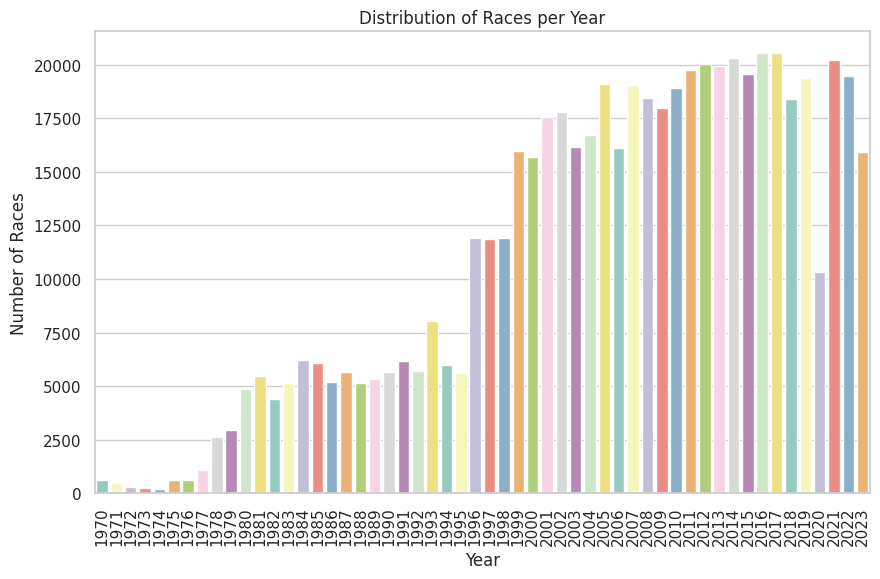

In [ ]:
races_per_year = pd.to_datetime(races['date'], errors='coerce').dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=races_per_year.index, y=races_per_year.values,hue=races_per_year.index, legend=False, palette='Set3')
plt.title('Distribution of Races per Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.xticks(rotation=90)
plt.show()


The last thing to highlight is the distribution of races based on the surface, as you can see there are only races on tarmac which makes the three entries ​​in the dataset insignificant.

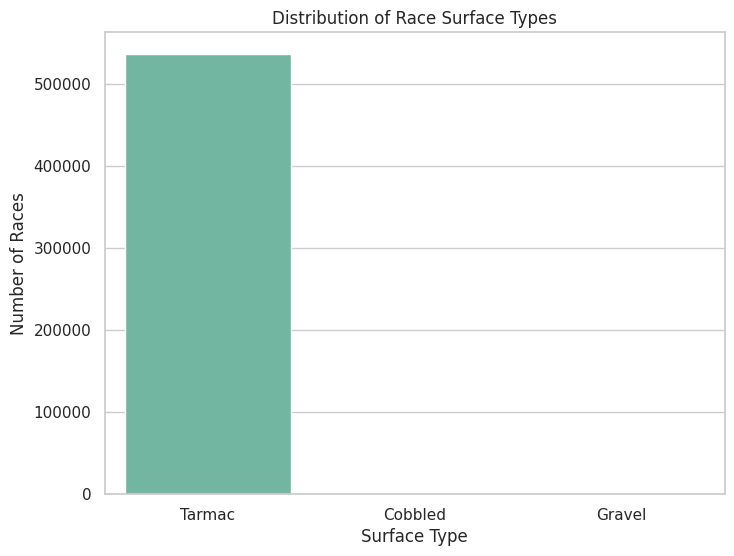

In [ ]:
surface_distribution = pd.DataFrame({
    'Surface Type': ['Tarmac', 'Cobbled', 'Gravel'],
    'Count': [
        races['is_tarmac'].sum(),
        races['is_cobbled'].sum(),
        races['is_gravel'].sum()
    ]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=surface_distribution, x='Surface Type', y='Count', hue='Surface Type', palette='Set2')
plt.title('Distribution of Race Surface Types')
plt.xlabel('Surface Type')
plt.ylabel('Number of Races')
plt.show()

The objective here is to understand how consistently different cycling teams perform by looking at their variability in race positions and points. By analyzing these variances, we can identify which teams maintain stable performances across events and which ones have more fluctuations. This insight helps us recognize the most reliable teams in terms of results and those that may have more unpredictable performances.

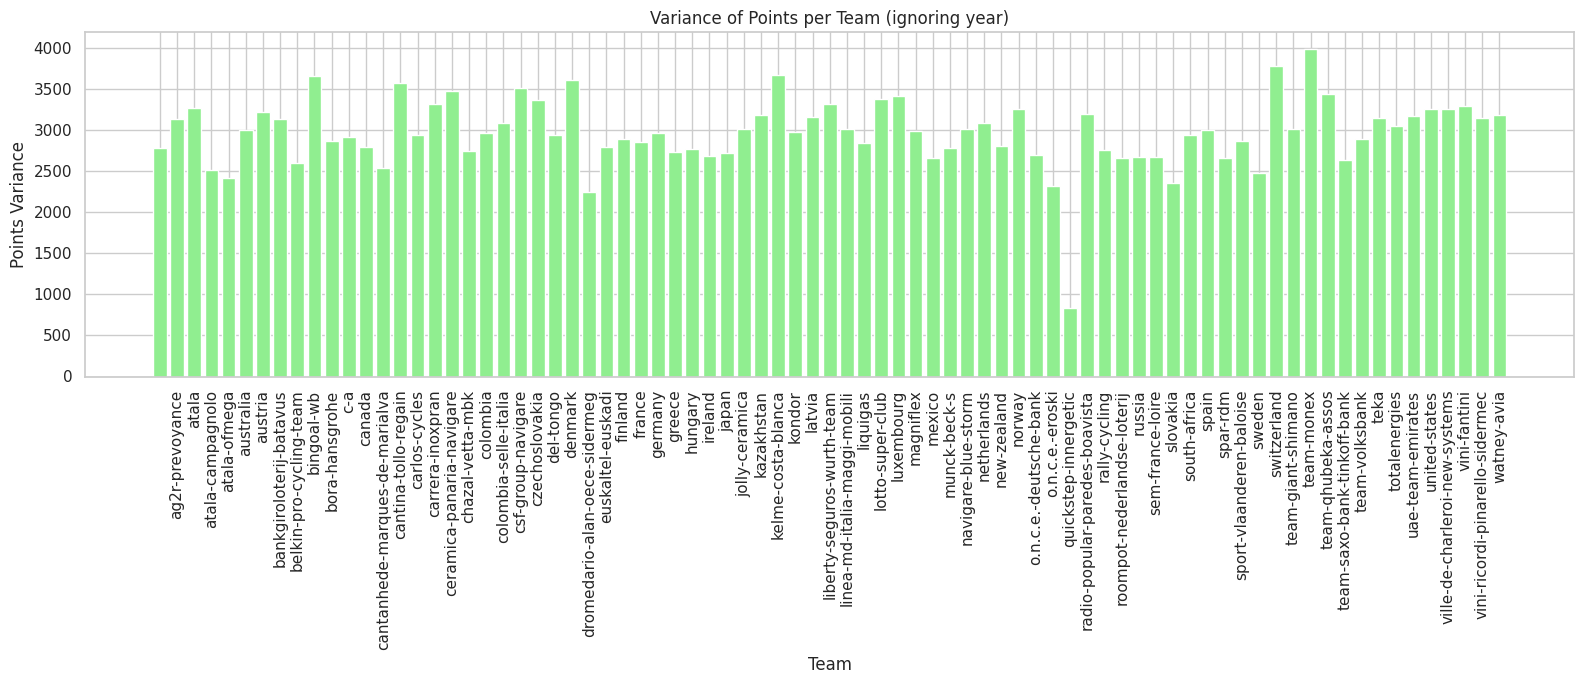

In [ ]:
import re

# Merge datasets for races and cyclists
merged_data = pd.merge(races, cyclists, left_on='cyclist', right_on='_url', how='inner')

# Function to extract team name without the year
def remove_year_from_team_name(team_name):
    # Extract everything before any digits (assuming the year is a 4-digit number)
    return re.sub(r'-\d{4}$', '', team_name)

# Apply function to remove the year from team names
merged_data['cyclist_team'] = merged_data['cyclist_team'].apply(lambda x: remove_year_from_team_name(str(x)) if pd.notnull(x) else '')

# Function to calculate the variance of positions and points for each team
def analyze_team_performance_variance(data):
    team_variance = {}

    # Group by team (without year)
    teams = data.groupby('cyclist_team')

    for team_name, group in teams:
        # Calculate variance for positions and UCI points
        position_variance = group['position'].var()
        points_variance = group['points'].var()

        # Add results to dictionary
        team_variance[team_name] = {
            'position_variance': position_variance,
            'points_variance': points_variance
        }

    return team_variance

# Run the analysis
team_performance_variance = analyze_team_performance_variance(merged_data)

# Create lists of teams and variances
teams = list(team_performance_variance.keys())
position_variances = [v['position_variance'] for v in team_performance_variance.values()]
points_variances = [v['points_variance'] for v in team_performance_variance.values()]

# Plot variance of points per team
plt.figure(figsize=(16, 7))
plt.bar(teams, points_variances, color='lightgreen')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Points Variance')
plt.title('Variance of Points per Team (ignoring year)')
plt.tight_layout()
plt.show()


In this analysis, the goal is to explore how a cyclist's age correlates with their race performance, represented here by their average position in races. By grouping race data according to cyclists' ages, we calculate the average position and points for each age group. This allows us to identify any potential trends, such as whether younger or older cyclists tend to perform better in terms of positioning. Additionally, annotating the chart with the number of cyclists in each age group gives context to the averages and helps highlight any outliers or particularly common ages among competitors. This visualization ultimately provides insights into the relationship between experience (as reflected by age) and performance in competitive cycling.

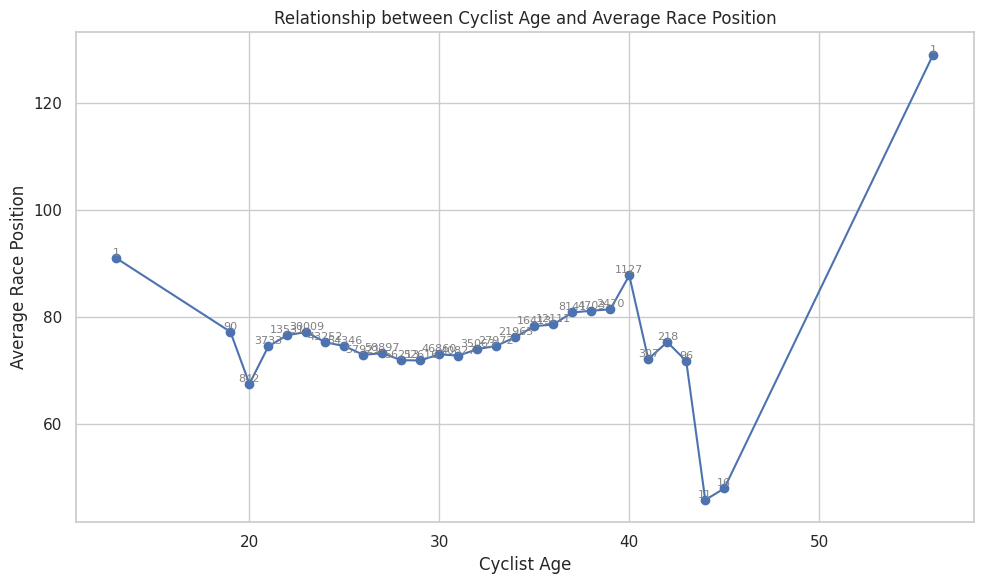

In [ ]:
# Merge datasets based on cyclist URL and race identifier
merged_data1 = pd.merge(races, cyclists, left_on='cyclist', right_on='_url', how='inner')

# Calculate the average age of cyclists during races
merged_data1['calculated_age'] = merged_data1['cyclist_age'].fillna(
    merged_data1['date'].apply(lambda x: int(x[:4])) - merged_data1['birth_year']
)

# Group data by age and calculate the average position, points, and count of cyclists
grouped_by_age = merged_data1.groupby('calculated_age').agg(
    avg_position=('position', 'mean'),
    avg_points=('points', 'mean'),
    count=('position', 'size')  # Count of elements per age
).reset_index()

# Plot: Relationship between age and average race position with count annotation
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_age['calculated_age'], grouped_by_age['avg_position'], marker='o', color='b')
plt.xlabel('Cyclist Age')
plt.ylabel('Average Race Position')
plt.title('Relationship between Cyclist Age and Average Race Position')

# Annotate the count of elements analyzed per age
for i, row in grouped_by_age.iterrows():
    plt.text(row['calculated_age'], row['avg_position'], f"{int(row['count'])}", 
             ha='center', va='bottom', fontsize=8, color='gray')

plt.grid(True)
plt.tight_layout()
plt.show()


The aim of this visualization is to examine the relationship between *cyclists* weight and height in connection with their positions in races. By using color and size variations to represent race position, we can quickly identify if certain physical attributes (e.g., height or weight) correlate with a better or worse position in the rankings. This analysis offers insights into whether specific physical profiles have any apparent advantages in competitive cycling contexts.

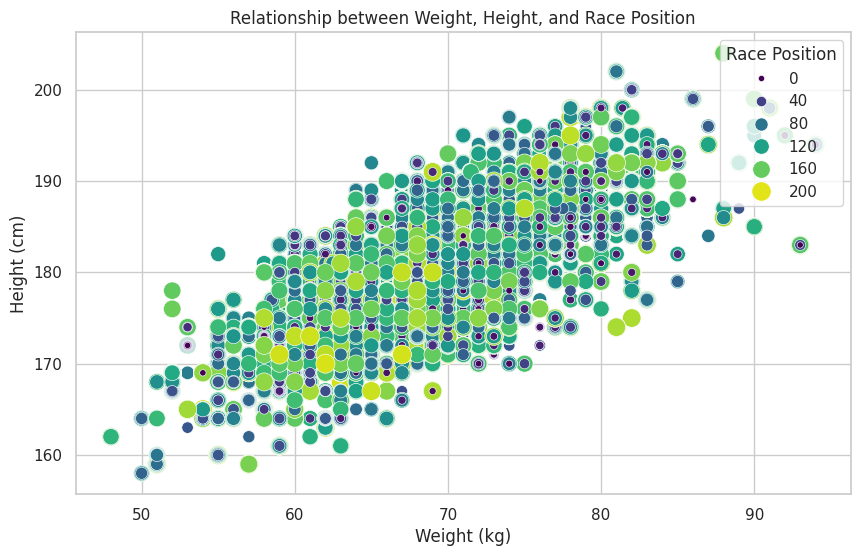

In [ ]:
# Merge datasets based on cyclist URL and race identifier
merged_data2 = pd.merge(races, cyclists, left_on='cyclist', right_on='_url', how='inner')

# Visualize the relationship between weight, height, and race position
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data2, x='weight', y='height', hue='position', size='position', sizes=(20, 200), palette='viridis')
plt.title('Relationship between Weight, Height, and Race Position')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend(title='Race Position', loc='upper right')
plt.grid(True)
plt.show()


The goal of this code is to explore the relationship between **weight**, **height**, and **race position** using a 3D scatter plot. By merging race and cyclist data, the plot visually shows how these physical attributes correlate with race performance, with position being color-coded to highlight trends.

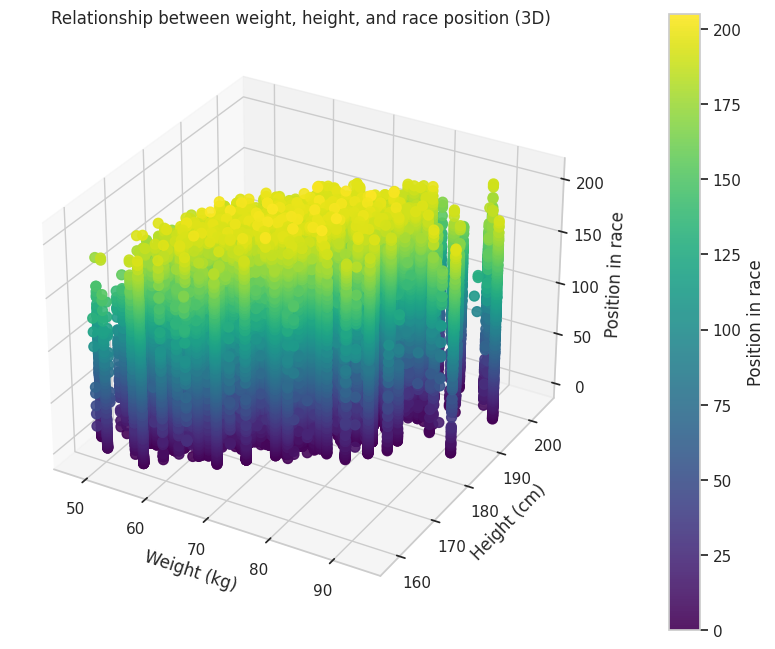

In [ ]:
# Merge datasets on 'cyclist' and '_url' columns with an inner join
merged_data3 = pd.merge(races, cyclists, left_on='cyclist', right_on='_url', how='inner')

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weight, height, and position
scatter = ax.scatter(merged_data3['weight'], merged_data3['height'], merged_data3['position'],
                     c=merged_data3['position'], cmap='viridis', s=50, alpha=0.9)

# Add axis labels
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Height (cm)')
ax.set_zlabel('Position in race')

# Add legend and color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Position in race')

plt.title('Relationship between weight, height, and race position (3D)')
plt.show()


The goal of this code is to filter the merged dataset for cyclists who finish in the top 3 positions. After cleaning the data to remove any rows with missing values for weight, height, or position, it calculates and displays descriptive statistics for the weight and height of the successful cyclists (those finishing in the top 3). These statistics help understand the physical characteristics of top performers.

In [ ]:
# Merge datasets based on cyclist URL and race identifier
merged_data4 = pd.merge(races, cyclists, left_on='cyclist', right_on='_url', how='inner')

# Remove rows with missing data for weight, height, or position
merged_data_cleaned = merged_data4.dropna(subset=['weight', 'height', 'position'])

# Define success as cyclists finishing in the top 3 positions
successful_cyclists = merged_data_cleaned[merged_data_cleaned['position'] <= 3]

# Calculate descriptive statistics for weight and height of successful cyclists
weight_stats = successful_cyclists['weight'].describe()
height_stats = successful_cyclists['height'].describe()

# Print the weight statistics of successful cyclists
print("Weight statistics of successful cyclists:")
print(weight_stats)

# Print the height statistics of successful cyclists
print("\nHeight statistics of successful cyclists:")
print(height_stats)


Weight statistics of successful cyclists:
count    16567.000000
mean        68.771172
std          6.300266
min         48.000000
25%         64.000000
50%         69.000000
75%         73.000000
max         94.000000
Name: weight, dtype: float64

Height statistics of successful cyclists:
count    16567.000000
mean       178.621476
std          5.783193
min        159.000000
25%        175.000000
50%        178.000000
75%        183.000000
max        199.000000
Name: height, dtype: float64


In this analysis, the objective is to examine the relationship between race length, total points, and elevation gain across different races. First, the data is cleaned to ensure that each race stage is represented by a single entry. The races are then grouped by their name, with the stage details removed, and the length is converted into kilometers for consistency. The total points and elevation gain for each race are aggregated to provide a broader view of the race characteristics.

To visualize the data, a scatter plot is created where race length is plotted against total points. The color of the points represents the total elevation gain for each race, helping to illustrate how these three factors—race length, points, and elevation—are interrelated. This visualization allows for a clear understanding of the impact of race characteristics on performance outcomes.

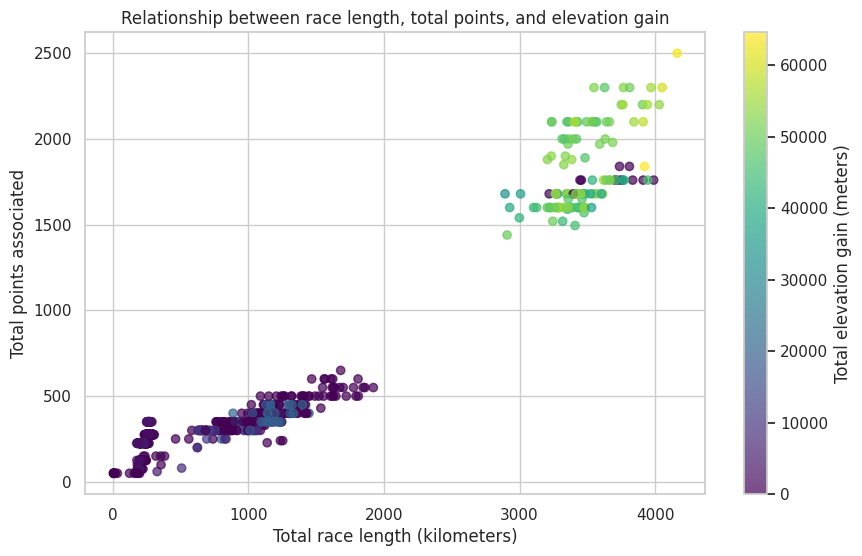

In [ ]:
# Filter data to remove duplicates based on '_url' (only one row per race stage)
races_unique = races.drop_duplicates(subset='_url').copy()

# Separate race name and remove "stage" details
races_unique.loc[:, 'race_group'] = races_unique['_url'].apply(lambda x: '/'.join(x.split('/')[:-1]))  # Remove stage part

# Convert length to kilometers (if values are in meters)
races_unique.loc[:, 'length_km'] = races_unique['length'] / 1000

# Group by race (country/year) and calculate the sum of "length", "points", and "climb_total" for each race
grouped_races = races_unique.groupby('race_group').agg({'length_km': 'sum', 'points': 'sum', 'climb_total': 'sum'}).reset_index()

# Create plot with "climb_total" represented by the color of the points
plt.figure(figsize=(10, 6))
scatter = plt.scatter(grouped_races['length_km'], grouped_races['points'], 
                      c=grouped_races['climb_total'], cmap='viridis', alpha=0.7)
plt.title('Relationship between race length, total points, and elevation gain')
plt.xlabel('Total race length (kilometers)')
plt.ylabel('Total points associated')
plt.colorbar(scatter, label='Total elevation gain (meters)')
plt.grid(True)
plt.show()

This is only to better analize what happens in the gap wee see above.

In [ ]:
# Filter data to remove duplicates based on '_url' (keep only one row per race stage)
races_unique = races.drop_duplicates(subset='_url').copy()

# Separate the race name and remove the "stage" part
races_unique['race_group'] = races_unique['_url'].apply(lambda x: '/'.join(x.split('/')[:-1]))

# Convert length to kilometers (if values are in meters)
races_unique['length_km'] = races_unique['length'] / 1000

# Group by race (country/year) and calculate the total length for each race
grouped_races = races_unique.groupby('race_group').agg({'length_km': 'sum', 'points': 'sum'}).reset_index()

# Filter races with a total length between 2000 km and 3000 km
filtered_races = grouped_races[(grouped_races['length_km'] >= 2000) & (grouped_races['length_km'] <= 3000)]

# Print the filtered races
print(filtered_races)



               race_group  length_km  points
974  vuelta-a-espana/2000     2892.9  1680.0
977  vuelta-a-espana/2003     2927.4  1600.0
978  vuelta-a-espana/2004     2998.9  1540.0
994  vuelta-a-espana/2020     2908.0  1440.0


In this analysis, we are looking to explore how the average race position varies by cyclist nationality. By merging data from two sources, we combine the cyclists' nationality and their race positions into one table. From there, we calculate the average position for each nationality, along with how many cyclists participated in races for each country.

The color of the bars reflects the number of race records for that nationality.

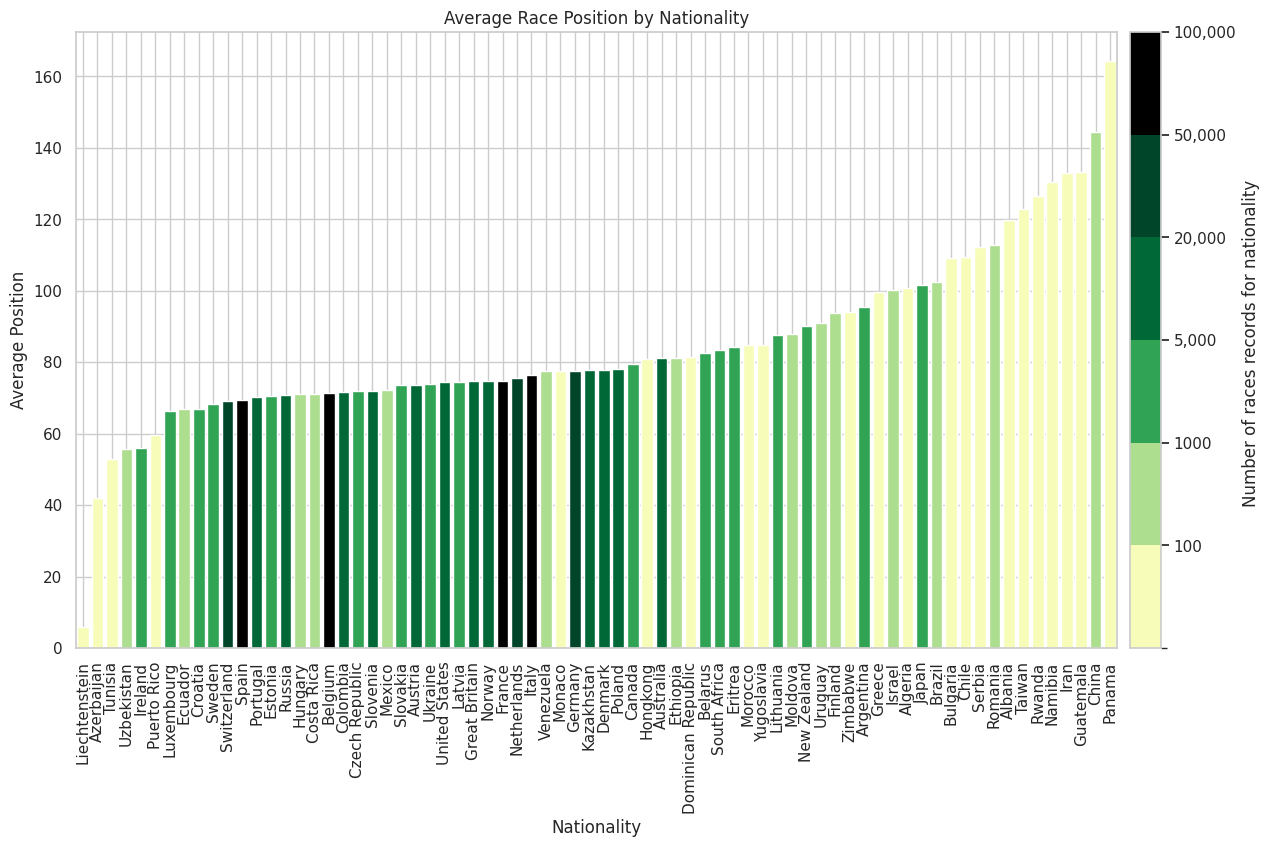

In [ ]:
# Merge the races and cyclists datasets to have both nationality and position in the same table
merged_data = pd.merge(races, cyclists, left_on='cyclist', right_on='_url', how='inner')

# Calculate the average race position and count of cyclists for each nationality
average_position = merged_data.groupby('nationality').agg({'position': 'mean', 'cyclist': 'count'}).reset_index()
average_position = average_position.rename(columns={'cyclist': 'num_cyclists'})

# Sort values to make the plot more readable
average_position = average_position.sort_values(by='position')

# Define bins and corresponding colors
bins = [0, 100, 1000, 5000, 20000, 50000,100000]
colors = ['#f7fcb9', '#addd8e', '#31a354', '#006837', '#004529','#000000']  # Custom colors from light to dark

# Create a function to assign colors based on the number of cyclists
def get_color(num):
    for i in range(len(bins) - 1):
        if bins[i] < num <= bins[i + 1]:
            return colors[i]
    return colors[-1]  # Return the last color if it exceeds the last bin

# Assign colors based on the number of cyclists
average_position['color'] = average_position['num_cyclists'].apply(get_color)

# Plot the average race position by nationality
plt.figure(figsize=(16, 8))
bars = sns.barplot(data=average_position, x='nationality', y='position')

# Set colors based on the number of cyclists
for index, bar in enumerate(bars.patches):
    bar.set_facecolor(average_position['color'].iloc[index])

# Set the plot title and labels
plt.title('Average Race Position by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Average Position')

# Rotate nationality labels on the x-axis for better readability
plt.xticks(rotation=90)
plt.grid(True)

# Create a color bar manually
cmap = plt.cm.colors.ListedColormap(colors)
bounds = bins
norm = plt.cm.colors.BoundaryNorm(boundaries=bounds, ncolors=len(colors))

# Create the color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=bars, pad=0.01)
cbar.set_label("Number of races records for nationality ")

# Set the ticks and labels for the color bar
cbar.set_ticks([100, 1000, 5000, 20000, 50000,100000])
cbar.set_ticklabels(['100', '1000', '5,000', '20,000', '50,000','100,000'])

plt.show()


This code analyzes how **weight** and **height categories** correlate with **race position**, with a focus on potential patterns by **nationality**. The dataset is divided into five distinct bins for both weight (from "Low" to "High") and height (from "Short" to "Tall"), allowing for categorization of athletes based on these physical attributes.

By plotting race position against combined weight and height categories, this visualization highlights any potential relationship between a cyclist's physical characteristics and their race performance. Coloring by nationality further emphasizes potential cultural or regional trends in athlete performance across various body types, providing insights into how physical build and nationality might jointly influence race outcomes. This approach can help reveal if particular physical profiles are more competitive or prevalent within specific nationalities.

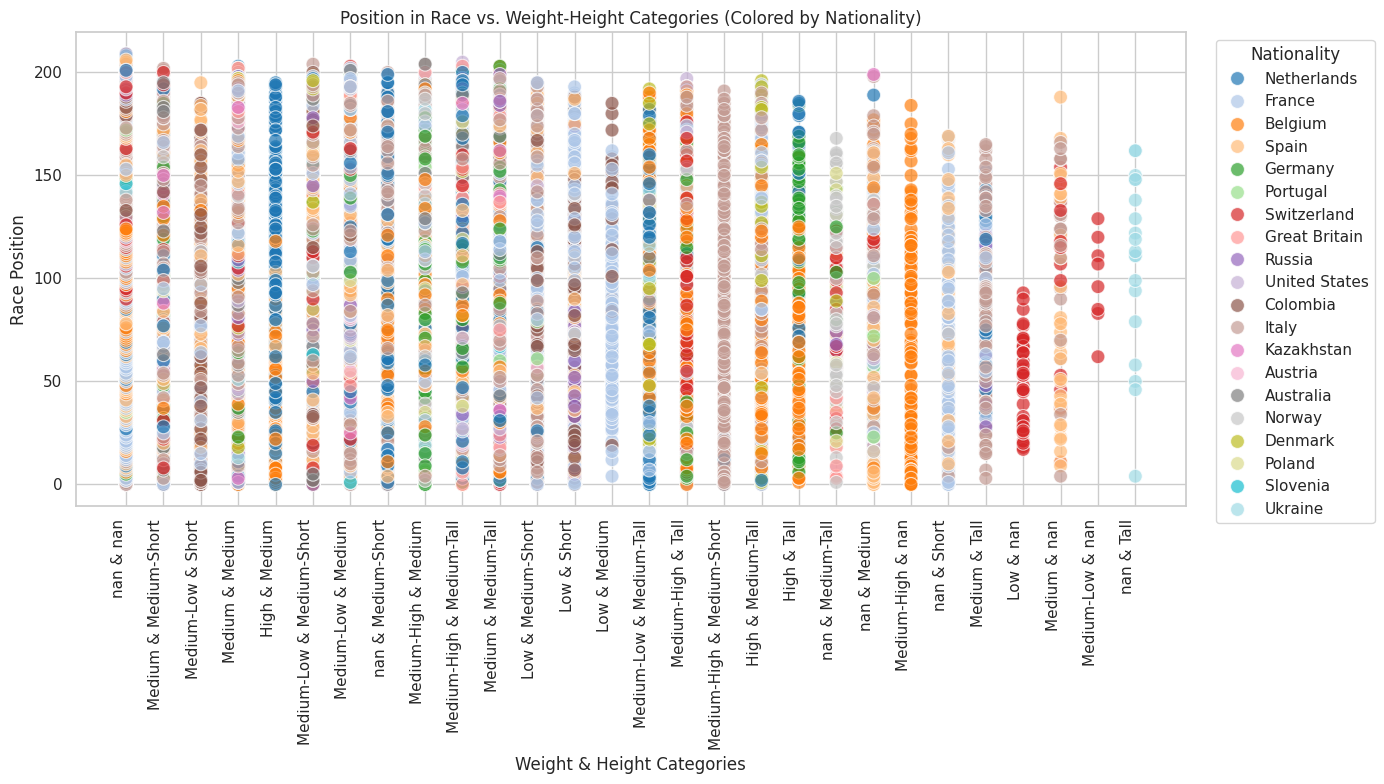

In [ ]:
# Create bins for weight and height
merged_data1['weight_bins'] = pd.cut(merged_data1['weight'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
merged_data1['height_bins'] = pd.cut(merged_data1['height'], bins=5, labels=['Short', 'Medium-Short', 'Medium', 'Medium-Tall', 'Tall'])

# Create a variable for combinations of weight and height categories
merged_data1['weight_height_comb'] = merged_data1['weight_bins'].astype(str) + " & " + merged_data1['height_bins'].astype(str)

# Get the top 10 nationalities by count
top_nationalities = merged_data1['nationality'].value_counts().head(20).index

# Filter data for the top nationalities
filtered_data = merged_data1[merged_data1['nationality'].isin(top_nationalities)]


# Configure the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=filtered_data,
    x='weight_height_comb',
    y='position',
    hue='nationality',
    palette='tab20',
    s=100,
    alpha=0.7
)

# Set axis labels and title
plt.title('Position in Race vs. Weight-Height Categories (Colored by Nationality)')
plt.xlabel('Weight & Height Categories')
plt.ylabel('Race Position')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Nationality', bbox_to_anchor=(1.02, 1), loc='upper left')

# Add grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

This code differentiates races based on whether they **award UCI points** or not, providing insight into the distribution of point-awarding events. By creating a new column that labels each race as either "Awards UCI Points" or "Does Not Award UCI Points," the code captures a critical characteristic that can influence race prestige and competitiveness.

The resulting **bar plot** visualizes the number of races in each category, allowing for a straightforward comparison. This analysis is useful in understanding the prevalence of point-awarding races, which may indicate the structure and competitive hierarchy within cycling events. The color distinction enhances the visual contrast, emphasizing the disparity between these two types of races.

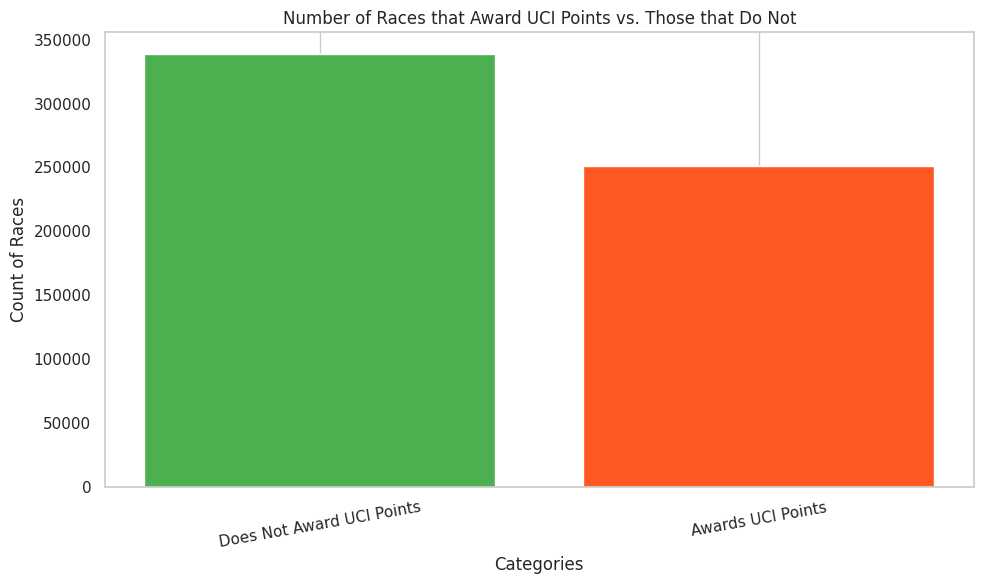

In [ ]:
# Create a new column to indicate whether the race awards UCI points
races['awards_uci_points'] = races['uci_points'].apply(lambda x: 'Awards UCI Points' if x > 0 else 'Does Not Award UCI Points')

# Count the number of races in each category
uci_points_count = races['awards_uci_points'].value_counts()

# Create a bar plot to display the counts
plt.figure(figsize=(10, 6))
plt.bar(uci_points_count.index, uci_points_count.values, color=['#4CAF50', '#FF5722'])
plt.title('Number of Races that Award UCI Points vs. Those that Do Not')
plt.xlabel('Categories')
plt.ylabel('Count of Races')
plt.xticks(rotation=10)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


The goal of this analysis is to understand how various race attributes, such as profile, length, and startlist quality, influence the performance of cyclists, measured by points and UCI points. By examining these relationships, we aim to gain insights into which factors most significantly affect race outcomes. The scatter plots allow us to visually explore how these elements correlate with performance, helping us better understand the dynamics between race characteristics and cyclist results.

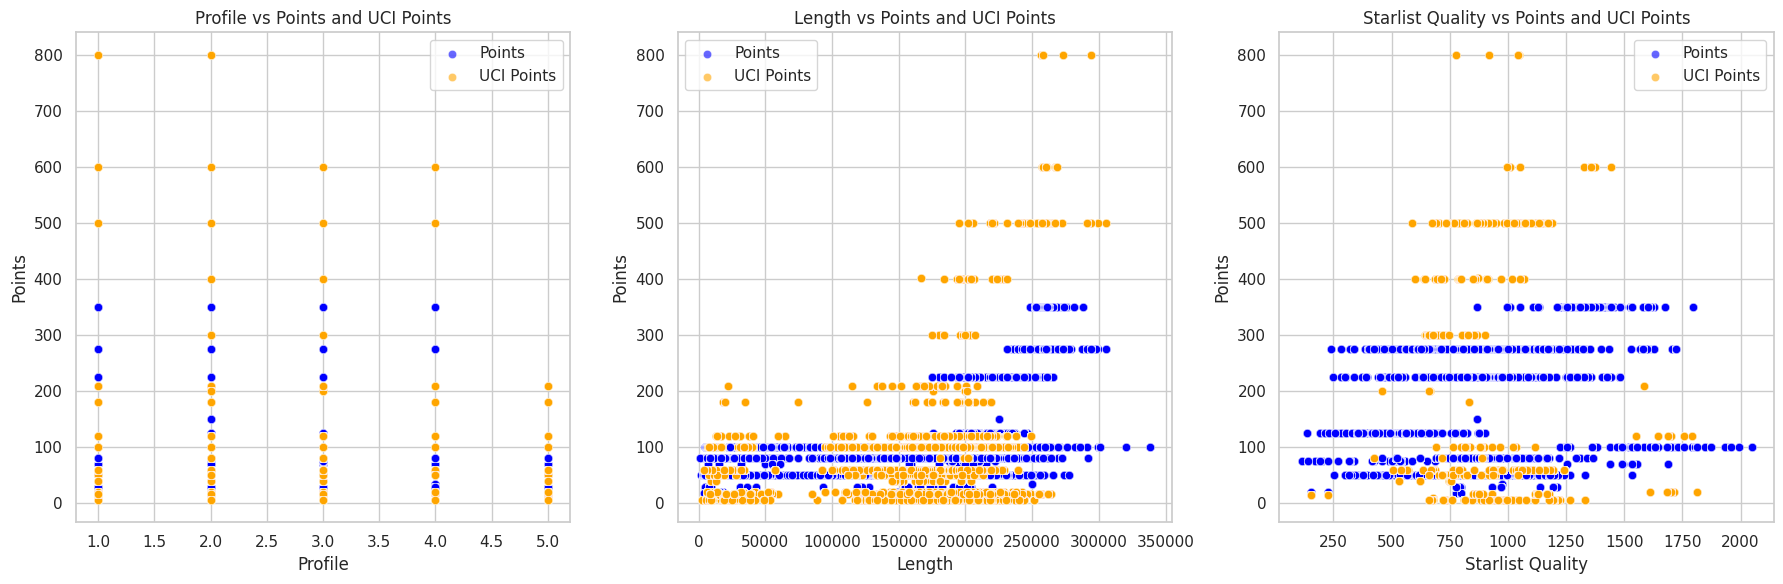

In [ ]:

# Assuming merged_data5 is already created and contains the necessary columns
merged_data5 = pd.merge(races, cyclists, left_on='cyclist', right_on='_url', how='inner')

# Set the figure size for better visualization
plt.figure(figsize=(18, 6))

# Scatter plot for Profile vs Points and UCI Points
plt.subplot(1, 3, 1)
sns.scatterplot(data=merged_data5, x='profile', y='points', color='blue', label='Points', alpha=0.6)
sns.scatterplot(data=merged_data5, x='profile', y='uci_points', color='orange', label='UCI Points', alpha=0.6)
plt.title('Profile vs Points and UCI Points')
plt.xlabel('Profile')
plt.ylabel('Points')
plt.legend()

# Scatter plot for Length vs Points and UCI Points
plt.subplot(1, 3, 2)
sns.scatterplot(data=merged_data5, x='length', y='points', color='blue', label='Points', alpha=0.6)
sns.scatterplot(data=merged_data5, x='length', y='uci_points', color='orange', label='UCI Points', alpha=0.6)
plt.title('Length vs Points and UCI Points')
plt.xlabel('Length')
plt.ylabel('Points')
plt.legend()

# Scatter plot for Starlist Quality vs Points and UCI Points
plt.subplot(1, 3, 3)
sns.scatterplot(data=merged_data5, x='startlist_quality', y='points', color='blue', label='Points', alpha=0.6)
sns.scatterplot(data=merged_data5, x='startlist_quality', y='uci_points', color='orange', label='UCI Points', alpha=0.6)
plt.title('Starlist Quality vs Points and UCI Points')
plt.xlabel('Starlist Quality')
plt.ylabel('Points')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
